In [1]:
import py3dep
import geopandas as gpd
import rasterio as rio

rainier_box = gpd.read_file("shapefiles/mt_rainier.geojson")
print(rainier_box.crs)
rainier_box = rainier_box['geometry'][0]

dem = py3dep.get_map("DEM", rainier_box, resolution=10, geo_crs="epsg:4326", crs="epsg:3857")
dem.name = "dem"
dem.attrs["units"] = "meters"
dem = dem.rio.reproject('EPSG:32610', resampling=rio.enums.Resampling.cubic) # ok for DEM
dem.rio.to_raster("dem_rainier_py3dep.tif")
print(dem.rio.bounds())

aspect = py3dep.get_map("Aspect Degrees", rainier_box, resolution=10, geo_crs="epsg:4326", crs="epsg:3857")
aspect.name = "aspect"
aspect.attrs["units"] = "degrees"
print("Aspect min-max before reprojecting:", float(aspect.min()), float(aspect.max()))
aspect = aspect.rio.reproject('EPSG:32610', resampling=rio.enums.Resampling.nearest) # don't use cubic for degrees, just take nearest neighbor
aspect.rio.to_raster("aspect_rainier_py3dep.tif")
print(aspect.rio.bounds())
print("Aspect min-max after reprojecting:", float(aspect.min()), float(aspect.max()))

epsg:4326
(584004.6661029246, 5179380.202299774, 605743.6738891698, 5200619.692443872)
Aspect min-max before reprojecting: 0.0 359.0
(584004.6661029246, 5179380.202299774, 605743.6738891698, 5200619.692443872)
Aspect min-max after reprojecting: 0.0 32767.0


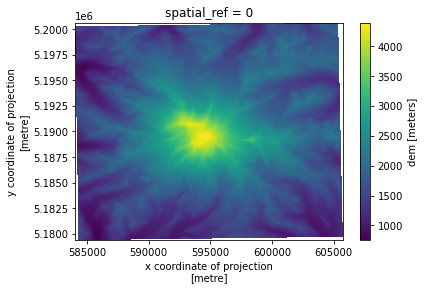

In [5]:
dem.plot()

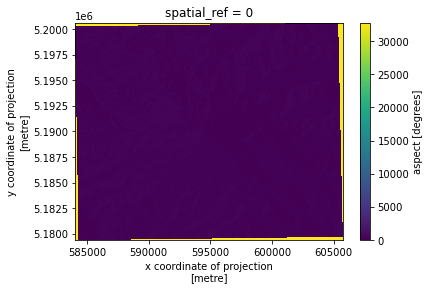

In [4]:
aspect.plot()